In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure
import matplotlib

In [2]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.min_rows', 500)

# Reading in the CSV

In [35]:
main_df = pd.read_csv('player_box_scores_clean.csv')

In [36]:
main_df.head()

,slug,date,name,age,team,away,opponent,game_result,minutes_played,field_goals,field_goals_att,field_goal_perc,three_point_made,three_point_att,three_point_perc,free_throws_made,free_throws_att,free_throw_perc,offensive_rebound,defensive_rebound,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points,game_score,plus_minus
0,cartevi01,1999-02-05,Vince Carter,22,TOR,1,BOS,11.0,31.21,5.0,11.0,0.455,0.0,1.0,0.0,6.0,8.0,0.750,1.0,2.0,3.0,2.0,2.0,1.0,1.0,3.0,16.0,12.7,NaN
1,cartevi01,1999-02-06,Vince Carter,22,TOR,1,WAS,-1.0,31.38,2.0,7.0,0.286,0.0,0.0,NaN,0.0,0.0,NaN,1.0,4.0,5.0,2.0,1.0,0.0,2.0,4.0,4.0,0.6,NaN
2,cartevi01,1999-02-09,Vince Carter,22,TOR,0,MIL,-14.0,35.56,9.0,13.0,0.692,0.0,2.0,0.0,4.0,6.0,0.667,1.0,2.0,3.0,2.0,0.0,2.0,3.0,3.0,22.0,15.6,NaN
3,cartevi01,1999-02-11,Vince Carter,22,TOR,1,MIA,-18.0,32.53,2.0,5.0,0.400,0.0,0.0,NaN,3.0,6.0,0.500,1.0,3.0,4.0,1.0,2.0,0.0,0.0,2.0,7.0,6.6,NaN
4,cartevi01,1999-02-16,Vince Carter,22,TOR,1,NYK,-10.0,40.31,6.0,12.0,0.500,0.0,1.0,0.0,5.0,6.0,0.833,1.0,2.0,3.0,2.0,2.0,4.0,1.0,5.0,17.0,15.1,NaN


# Aggregating team totals by date and merging onto main DF

In [37]:
sorted_main = main_df.groupby(['date', 'team'])

In [38]:
sorted_main_df = pd.DataFrame(sorted_main['field_goals_att', 'free_throws_att', 'turnovers', 'minutes_played' ].sum())

In [39]:
test_sorted_df = sorted_main_df.reset_index()

In [40]:
test_sorted_df['date_string'] = test_sorted_df['date'].astype(str)

In [41]:
test_sorted_df['combined'] = test_sorted_df['date_string'] + test_sorted_df['team']

In [42]:
test_sorted_df.rename(columns={'field_goals_att' : 'team_field_goals', 'free_throws_att' : 'team_free_throws_att', 'turnovers':'team_turnovers', 'team' : 'drop_team', 'date' : 'drop_date', 'date_string' : 'drop_date_string', 'minutes_played' : 'team_minutes_played'}, inplace=True)

In [43]:
main_df['date_string'] = main_df['date'].astype(str)

In [44]:
main_df['combined'] = main_df['date_string'] + main_df['team']

In [45]:
result_final = main_df.merge(test_sorted_df, how='left', left_on='combined', right_on='combined')

In [46]:
result_final.rename(columns={'team_field_goals_x' : 'team_field_goals', 'team_free_throws_att_x' : 'team_free_throws_att', 'team_turnovers_x' : 'team_turnovers'}, inplace=True)

In [47]:
result_final.drop(columns= ['drop_team', 'drop_date', 'drop_date_string'], inplace= True)

In [48]:
main_df = result_final

# Feature Engineering

In [49]:
main_df['true_shooting_att'] = main_df['field_goals_att'] + 0.44 * main_df['free_throws_att']

In [50]:
main_df['true_shooting_%'] = main_df['points']/(2*main_df['true_shooting_att']) 

In [51]:
main_df['date'] = pd.to_datetime(main_df['date'])

In [52]:
main_df['usage_rate'] = 100 * ((main_df['field_goals_att'] + 0.44 * main_df['free_throws_att'] + main_df['turnovers']) * (main_df['team_minutes_played'] / 5)) / (main_df['minutes_played'] * (main_df['team_field_goals'] + 0.44 * main_df['team_free_throws_att'] + main_df['team_turnovers']))

In [53]:
main_df['fantasy_points'] = main_df['points'] + (main_df['three_point_made'] / 2) + (main_df['total_rebounds'] * 1.25) + (main_df['assists'] * 1.5) + (main_df['steals'] * 2) + (main_df['blocks'] * 2) - (main_df['turnovers'] / 2) 

In [66]:
main_df.set_index(pd.DatetimeIndex(main_df['date']), inplace = True)

In [72]:
present_df = main_df.loc['2020']

# Making Celtics DataFrame

In [55]:
celtics_df = main_df[main_df['team'] == 'BOS']

In [60]:
celtics_df.set_index(pd.DatetimeIndex(celtics_df['date']), inplace = True)

In [61]:
celtics_df.drop(columns = ['date'], inplace = True)

/Users/drew/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Making a Dataframe for Tatum

In [62]:
tatum_df = celtics_df[(celtics_df['slug'] == 'tatumja01')]

In [63]:
tatum_df = tatum_df[pd.notnull(tatum_df['minutes_played'])]

# EDA

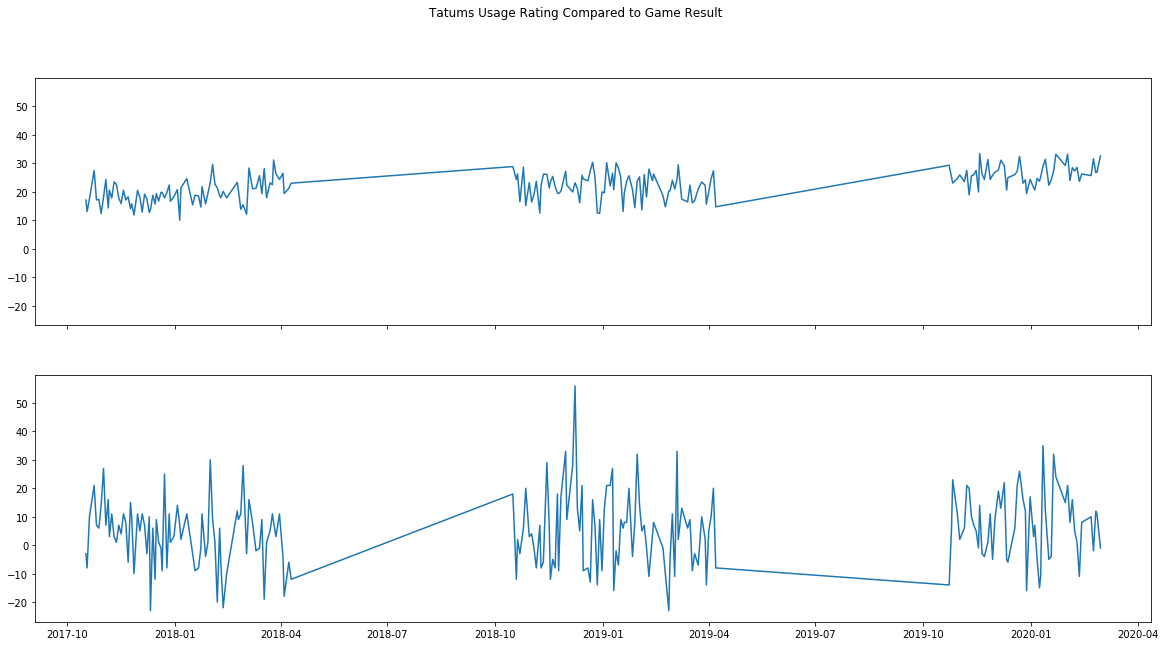

In [64]:
fig, axs = plt.subplots(2, figsize=(20, 10), sharex=True, sharey=True)
fig.suptitle('Tatums Usage Rating Compared to Game Result')
axs[0].plot(tatum_df['usage_rate'])
axs[1].plot(tatum_df['game_result']);

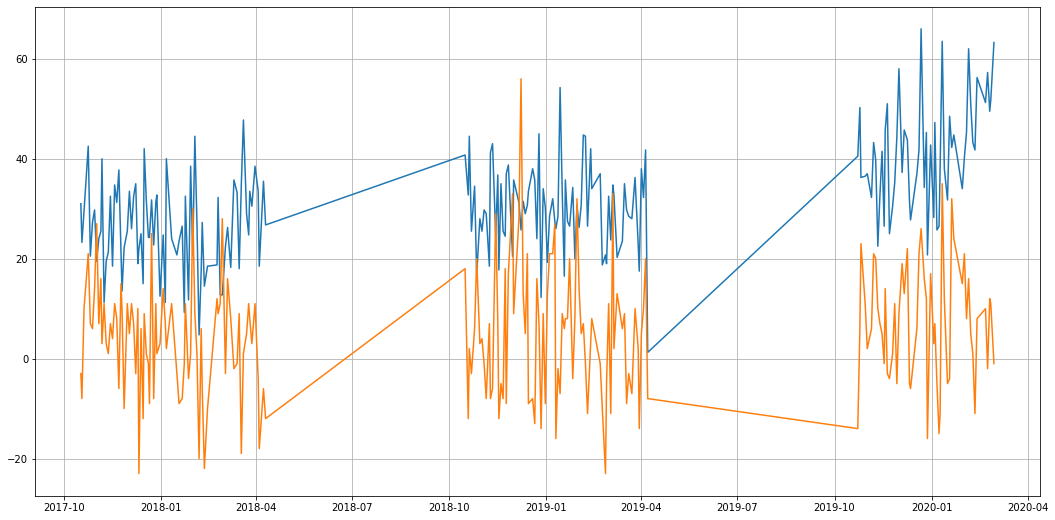

In [65]:
plt.figure(figsize=(18,9))
plt.plot(tatum_df['fantasy_points'])
plt.plot(tatum_df['game_result'])
plt.xticks()
plt.grid()

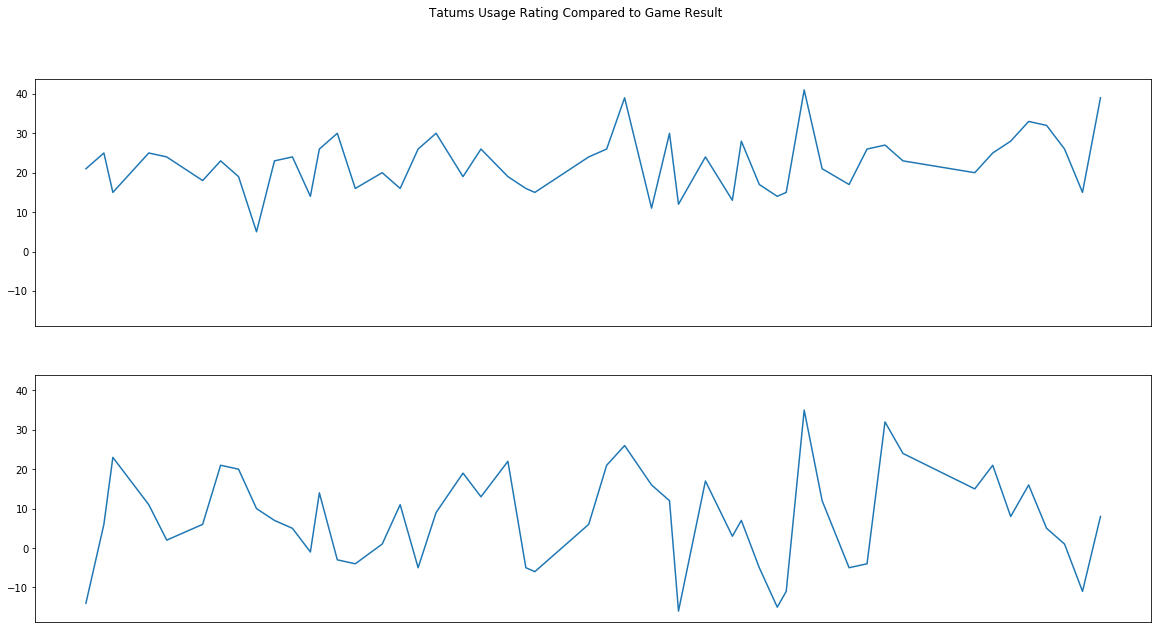

In [778]:
fig, axs = plt.subplots(2, figsize=(20, 10), sharex=True, sharey=True)
fig.suptitle('Tatums Usage Rating Compared to Game Result')
axs[0].plot(tatum_df['points'])
axs[0].set_xticks([15])
axs[1].plot(tatum_df['game_result'])
axs[1].set_xticks([15])

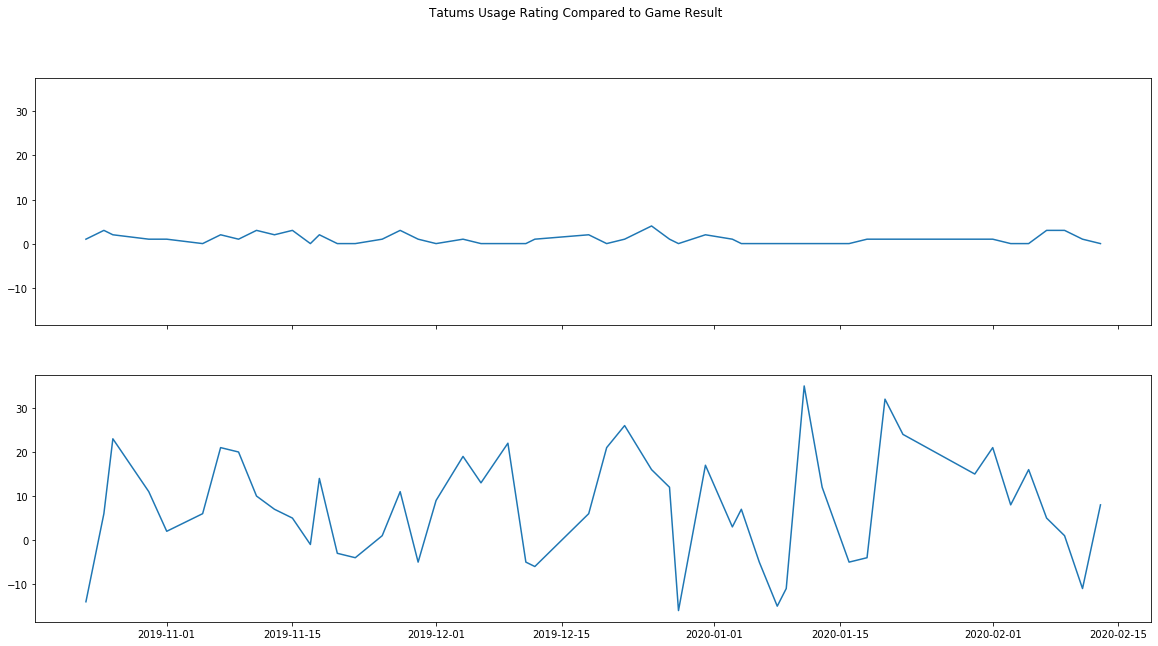

In [756]:
fig, axs = plt.subplots(2, figsize=(20, 10), sharex=True, sharey=True)
fig.suptitle('Tatums Usage Rating Compared to Game Result')
axs[0].plot(tatum_df[''])
axs[1].plot(tatum_df['game_result']);

In [822]:
tatum_df.to_csv('tatum_df_2.csv')

In [128]:
main_df.to_csv('main_df.csv')

In [73]:
present_df = main_df.loc['2020']

In [74]:
present_df.to_csv('2020_games.csv')